# BootCamp 2019 - Week 1

## Newton's Method

Author: Martina Fraschini

In [1]:
# import packages
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt

### Problem 1

In [2]:
# define function for Newton's method
def Newton(f, x0, f1, tol, maxiter):
    conv = False
    for n in range(maxiter):
        x1 = x0 - f(x0)/f1(x0)
        if abs(x1 - x0) < tol:
            conv = True
            break
        x0 = x1
    return (x1, conv, n)
    
# demo for the function
tol = 10**(-5)
maxiter = 15
x0 = 1
f = lambda x: x**4 - 3
f1 = lambda x: 4*x**3

(xbar, convergence, niter) = Newton(f, x0, f1, tol, maxiter)

if convergence:
    print("Newton's method converged to ", xbar, "after ", niter, "iterations")
else:
    print("Newton's method didn't converge, the best guess is ", xbar)

Newton's method converged to  1.3160740129543826 after  4 iterations


### Problem 3

In [3]:
# define function for Newton's method with backtracking
def Newton_backtracking(f, x0, f1, tol, maxiter, alpha):
    conv = False
    for n in range(maxiter):
        x1 = x0 - alpha * f(x0)/f1(x0)
        if abs(x1 - x0) < tol:
            conv = True
            break
        x0 = x1
    return (x1, conv, n)
    
# demo for the function
tol = 10**(-5)
maxiter = 15
x0 = .01
alpha = .4
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f1 = lambda x: (1./3) * np.power(np.abs(x), -2./3)

(xbar, convergence, niter) = Newton_backtracking(f, x0, f1, tol, maxiter, alpha)

if convergence:
    print("Newton's method converged to ", xbar, "after ", niter, "iterations")
else:
    print("Newton's method didn't converge, the best guess is ", xbar)

Newton's method converged to  6.400000000000134e-07 after  5 iterations


### Problem 4

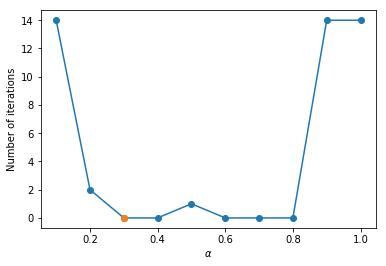

In [4]:
# define function for Newton's method with backtracking and different alphas
def Newton_alpha(f, x0, f1, tol, maxiter):
    alpha = np.linspace(0,1,11)
    alpha = alpha[1:]
    niter = np.zeros_like(alpha)
    for i in range(len(alpha)):
        for n in range(maxiter):
            x1 = x0 - alpha[i] * f(x0)/f1(x0)
            if abs(x1 - x0) < tol:
                break
            x0 = x1
        niter[i] = n
    
    plt.plot(alpha, niter, 'o-')
    plt.plot(alpha[np.argmin(niter)], min(niter), 'o')
    plt.xlabel(r"$\alpha$")
    plt.ylabel("Number of iterations")
    plt.show()
    return

# demo for the function
tol = 10**(-5)
maxiter = 15
x0 = .01
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f1 = lambda x: (1./3) * np.power(np.abs(x), -2./3)

Newton_alpha(f, x0, f1, tol, maxiter)



### Problem 7

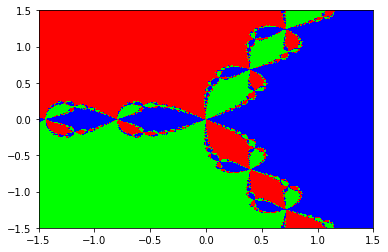

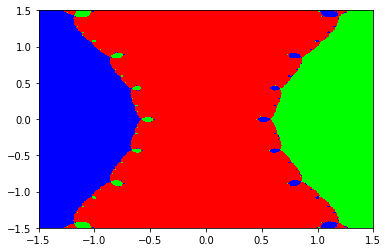

In [5]:
# define the function
def complex_diff(a, b):
    return np.sqrt((a.real-b.real)**2 + (a.imag-b.imag)**2)

def Newton_fractal(f, f1, zeros, bounds, res, iters):
    x_real = np.linspace(bounds[0],bounds[1],res)
    x_imag = np.linspace(bounds[2],bounds[3],res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    Y = np.zeros((res,res))
    
    for n in range(iters):
        X_1 = X_0 - f(X_0)/f1(X_0)
        X_0 = X_1
        
    for i in range(res):
        for j in range(res):
            err = np.zeros_like(zeros)
            for k in range(len(zeros)):
                err[k] = complex_diff(X_0[i,j],zeros[k])
            Y[i,j] = np.argmin(err)

    plt.pcolormesh(X_real, X_imag, Y, cmap='brg')
    plt.show()
    return

# demo for function x^3-1
f = lambda x: x**3 - 1
f1 = lambda x: 3*x**2
zeros = np.array([1, 0.5+(np.sqrt(3)/2)*1j, -0.5-(np.sqrt(3)/2)*1j])
bounds = np.array([-1.5,1.5,-1.5,1.5])
res = 500
iters = 15

Newton_fractal(f, f1, zeros, bounds, res, iters)

# demo for function x^3-x
f = lambda x: x**3 - x
f1 = lambda x: 3*x**2 - 1
zeros = np.array([-1, 0, 1])
bounds = np.array([-1.5,1.5,-1.5,1.5])
res = 500
iters = 15

Newton_fractal(f, f1, zeros, bounds, res, iters)
